In [ ]:
pip install chart-studio

## Introduction ::

**Q&A segment :::** 

What we we need for these nice cake ?
  1) The data for veteran data scientist (Don't worry also I am a beginer)
  
  2) The brain working quite flawed
  
  3) A few hour crime documentary and book 
  
    -- That's all enjoy with it..


What is the aim of that kernel ? 
  My opinion crime is the most complicated genesin on the world. When the people try to formulate that or explain with some border that cause some pathetic problem. Our aim(mean my) arrive the same pathetic problem on this kernel. For that resualt I choose some step more deplorable than result and try  to follow these guide.
 


--------------------------------------------------



What we have the preperation part ?

* [Import series](#Import_series)

* [Column shoping](#Column_shoping)


What we have in the topic part ?

* [City perspective](#Cıty_perspectıve)  

* [Crime type's symphony](#Crime_type_symphony)

* [Suspect ID series](#Suspect_ID)

* [Some personal information combination](#Personal_Information) 




#### Import series :: <a id="Import_series"></a> <br>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chart_studio.plotly.plotly as py
from plotly.offline import init_notebook_mode,  iplot
init_notebook_mode(connected=True)

import plotly.express as px
import plotly.graph_objects as go



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Data import, column shoping exct. exct. <a id="Column_shoping"></a> <br>

In [ ]:
main_data = pd.read_csv("/kaggle/input/new-york-city-police-crime-data-historic/NYPD_Complaint_Data_Historic.csv",low_memory = False)
columns = main_data.columns
print(columns)

### City's perspective <a id="Cıty_perspectıve"></a> <br>


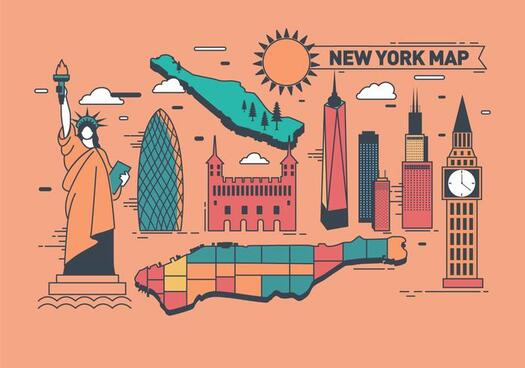


#### Graph issue ::: Occured city Occured supcity(or whatever it is)  Crime type

#### Graph type :::  Tree graph





|> That graph looks like a real estate agent advertisement (maybe they make much work from now). City crime correlation most plotted graph on crime notebooks and that's graph can not show crime count soo clearly but give a chance to understand the type of crime are most trouble-maker.  Soo Brooklyn has some bit more trouble with the offence. 


In [ ]:
handling_first_graph_data = (main_data[['BORO_NM', 'PATROL_BORO','LAW_CAT_CD']]).fillna('Unknow')
handling_first_graph_data['crime_count'] = [1] * len(handling_first_graph_data.BORO_NM.values)

In [ ]:
fig = px.treemap(handling_first_graph_data, path =['BORO_NM', 'PATROL_BORO','LAW_CAT_CD'], values='crime_count')
fig.show()

#### Graph issue ::: Crime rate of the city per year

#### Graph type ::: Bar + Line 



|>   On my view, year-offence graph not really express the year offence situation. They express mostly like economy-offence or (rarely) tech-offence situation. In the city wherever is there people(without psychology) and street will be the same next year so I ask that economical issue can be used like red cabbage juice? Economical position create a good background for the offence. For Brooklyn(like other cities), unbalanced economical distribution maybe causes more crime than other cities.

In [ ]:
# I just sperate the usefull data to that graph and drop the null date data and fill null in other col
Unfilter_year_data = ((main_data[['CMPLNT_FR_DT','BORO_NM','VIC_SEX','VIC_RACE']]).dropna(subset=['CMPLNT_FR_DT'],how='any')).fillna('UNKNOWN')
# Create the nex coll include only occured year
Unfilter_year_data['YEAR'] = Unfilter_year_data.CMPLNT_FR_DT.apply(lambda val: (val.split('/'))[2] )

In [ ]:
City = Unfilter_year_data.BORO_NM.unique()
Years = ['2006','2007','2008','2009','2010','2011', '2012','2013','2014','2015','2016','2017','2018']
Year_values = []

for city in City :
    Filter_data = Unfilter_year_data.loc[(Unfilter_year_data['BORO_NM'] == city)]
    Year_crime_count = (((Filter_data.groupby(['YEAR'])).count()).CMPLNT_FR_DT.values)
    
    # These complicated bullsh*it just eliminates the useless year like 1015 or 1016
    Year_values.append(list(Year_crime_count[(len(Year_crime_count)-13):len(Year_crime_count)]))

In [ ]:
import plotly.graph_objects as go 
fig = go.Figure()
Color_list= ['mediumslateblue','lightseagreen','orange','deeppink','pink']

for Index in range(5):
    fig.add_trace(go.Bar(name=City[Index], x=Years, y=Year_values[Index]))
    fig.add_trace(go.Scatter(name=City[Index],x=Years, y=Year_values[Index],
                             line=dict(color=Color_list[Index], width=2) ))
    
fig.show()

### Crime type's symphony<a id="Crime_type_symphony"></a> <br>


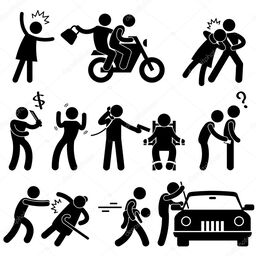


#### Graph issue ::: Spesific location combination (opposite of depertmant) count 

#### Graph type ::: Bar graph(stacked) 



Crime place is the most key element for an offence. Street crime has some special power in its body. Streets have some ability like uncoverable or unpreventable. On the other hand, houses have a shocking result. That cause the ask that Homicide is the golden problem for USA crime. 

In [ ]:
# First section
handling_second_graph_data = (main_data[['LOC_OF_OCCUR_DESC','PREM_TYP_DESC']]).fillna('Unknow')
handling_second_graph_data['crime_count'] = [1] * len(handling_second_graph_data.PREM_TYP_DESC.values)

# Second section
sort_index = (handling_second_graph_data.groupby(['PREM_TYP_DESC']).count()).crime_count.sort_values(ascending=False).index.values

# Third section
group_data=((handling_second_graph_data.groupby(['PREM_TYP_DESC','LOC_OF_OCCUR_DESC']).count()).unstack()).fillna(0)
sorted_group_data = group_data.reindex(sort_index)




In [ ]:
x_axis = sorted_group_data.index.values
columns = sorted_group_data.columns

fig  = go.Figure()

for col in columns :
    fig.add_trace(go.Bar(x=x_axis, y=sorted_group_data[col] , name = col[1]))
fig.update_layout(barmode = 'stack')
fig.show()

#### Graph Isue ::: Top 75 supCrime type(I am as dumb as cannot find the correct word)

#### Graph type ::: Pie graph



In the trusty border, That's graph not fit my knowledge capacity soo more cleaver or people who understand these subtype of crime.

In [ ]:
# We prepare the parent value
graph_data = (main_data[['LAW_CAT_CD', 'PD_DESC']]).fillna('Unknow')
parent_values = list(((graph_data.groupby('LAW_CAT_CD')).count())['PD_DESC'].values)

# we add the new columns , regroup again and reindex data set to label data
graph_data['count'] = [1] * len(graph_data['LAW_CAT_CD'].values)
staced_data= (graph_data.groupby(['LAW_CAT_CD', 'PD_DESC']).count())
sorted_staced_data = staced_data.reindex((staced_data["count"].sort_values(ascending=False)).index.values)

# We prepare label value
label_value = list(sorted_staced_data['count'].values)
total_values= parent_values +  label_value[0:75]
total_values.insert(0,0)

# sepere the index to label and parent labels
parrent_list , label_list = ['','Crime range','Crime range','Crime range' ],['Crime range','FELONY','MISDEMEANOR','VIOLATION']

for index in list(sorted_staced_data.index.values)[0:75] :
    parrent_list.append(index[0])
    label_list.append(index[1])

In [ ]:
fig = go.Figure(go.Sunburst( labels = label_list, parents = parrent_list, values = total_values))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()


#### Graph Issue ::: Most predictiable crime

#### Graph type ::: Bar graph



In all these results, I realize burglary column whisper something like money and determine of suspect. Weaponized America problem affects the crime completion percentage also felony assault section has the same result. Other side of groin(that is expression), self weaponization can prevent crime with a more deathly result.

Far away these two guys kidnapping has a very high prevention percentage. Thas make us happy and sad at the same time because that percentage does not pass the half-line and simply give that sad message half of the child are kidnapped on that crime.  

In [ ]:
# Data preperation stage
crime_attemp = main_data[['OFNS_DESC',"CRM_ATPT_CPTD_CD"]]

Filter_data = crime_attemp.loc[(crime_attemp.CRM_ATPT_CPTD_CD == 'COMPLETED')]
Complt_data = Filter_data.groupby(['OFNS_DESC']).count()

Filter_data = crime_attemp.loc[(crime_attemp.CRM_ATPT_CPTD_CD == 'ATTEMPTED')]
Atmpt_data = Filter_data.groupby(['OFNS_DESC']).count()

In [ ]:
# Data cleaning to littel bit good visulation
Index_list,Precentage_list_comp,Precentage_list_attmp= [],[],[]
sort_val_list, sort_index_list = [], []

for Index in Complt_data.index.values :
    
    complt_val = Complt_data.loc[(Complt_data.index == Index)].values
    attmp_val = Atmpt_data.loc[(Atmpt_data.index == Index)].values
    if len(attmp_val) == 0 : attmp_val = 0
        
    Sum = (complt_val + attmp_val) 
    
    Attamp_perc = int(((100*attmp_val)/Sum)+1)
    if Attamp_perc >= 5 : 
        Index_list.append(Index)
        Precentage_list_comp.append(int((100*complt_val)/Sum))
        Precentage_list_attmp.append(Attamp_perc)
        sort_val_list.append(Attamp_perc)
        sort_index_list.append(Index)

In [ ]:
# sort thenumerical and string values
Precentage_list_attmp.sort(reverse = True)
Precentage_list_comp.sort()

for val in range(len(Precentage_list_attmp)):
    main_index = sort_val_list.index(Precentage_list_attmp[val])
    sort_val_list[main_index] = 0
    Index_list[val] = sort_index_list[main_index]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Complated', x=Index_list, y=Precentage_list_comp),
    go.Bar(name='Attempted', x=Index_list, y=Precentage_list_attmp)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

### Suspect ID series<a id="Suspect_ID"></a> <br>


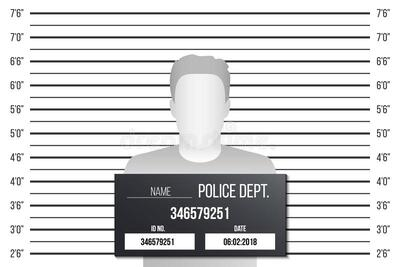

If you solving some problem, you probably find starting point. My opinion, The core of tthe crime problem was created by criminal people who repeted crıma agaın and again.Because of that in here I focus these people to understand the that How many time people keep going dark side.

In [ ]:
graph_dataset = main_data[['CMPLNT_NUM','OFNS_DESC','LAW_CAT_CD','BORO_NM']].dropna()

sus_ID_set = (graph_dataset.groupby("CMPLNT_NUM").count())

sorting_index = (sus_ID_set.OFNS_DESC.sort_values(ascending=False)).index.values


#### Graph Issue ::: Top 10 favorite player of NY crime team

#### Graph type ::: Polar chart



Thats graph look like a unnecessary because early graph we understand repeted crime coun nearly stable three thats actually realy good when we compare the Boston.Soo you ma ask why you plot that stupit think if its stupid. I just try somethink new but i cannot fix zero dots thats look ridiculous. If someone can fix its lease leave comment..

In [ ]:
fig = go.Figure()

Top_tenID = list(sorting_index)[0:10]
theta_list = ['FELONY','VIOLATION', 'MISDEMEANOR', 'FELONY']
color_list = ['antiquewhite','steelblue','cyan','skyblue','lightslategray',
              'mediumblue','olive','fuchsia','maroon','lightgoldenrodyellow']

Size = 33
for index in range(10):
    
    temp_dataset = graph_dataset.loc[(graph_dataset['CMPLNT_NUM']== Top_tenID[index])]
    value_list = list(temp_dataset.LAW_CAT_CD.values)
    
    count_list = [value_list.count(value) for value in theta_list[0:3]]
   
    fig.add_trace(go.Scatterpolargl(
      name = str(Top_tenID[index]),
      r = count_list,
      theta = theta_list,
      marker=dict(size=Size, color=color_list[index])
    ))

    Size -= 2.5
    
    fig.update_layout(
        polar = dict(
        radialaxis_angle = -45,
        angularaxis = dict(
        direction = "clockwise",
        period = 6)))
    
fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.6))


fig.update_layout(
    title = "Top 10 players of NY",
    font_size = 15,
    polar = dict(
      bgcolor = "rgb(213, 213, 213)",
      angularaxis = dict(
        linewidth = 3,
        showline=True,
        linecolor='azure'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        gridcolor = "white",
        gridwidth = 3,
      )
    ),
    paper_bgcolor = "rgb(190, 190, 190)")
fig.show()

### Some personal information combination (Race,Age scale) <a id="Personal_Information"></a> <br>


#### Graph Issue ::: Why we have mostly black race

#### Graph type ::: Sankey diagram



In [ ]:
Race_data = (main_data[['SUSP_RACE','VIC_RACE']]).fillna('UNKNOWN')
Race_data['SUSP_RACE'].value_counts(dropna = False)

In [ ]:
Race_data['VIC_RACE'].value_counts(dropna = False)

Okey. I am not a police or somethink like that but I can have enugh math to read these number so they look like a little strange. I know that police easly determine the victem race more than suspect. However that count little aproach the 2 milion also gap between the white and black on suspect side little (nearly twice times) more than victim side. I askt the that question by myself can police consciously don't report white victim for these racisim bulshit. I know thats look like very crazy idea but you word is change so fastly and its nor in good way.I'll just try something to build more understandable data.

In [ ]:
Indexer = list(Race_data['SUSP_RACE'].unique())
Values_dict = {}
Source = []
Target = []
Data_values_list = zip(list(Race_data['SUSP_RACE'].values),list(Race_data['VIC_RACE'].values))

for sus , vic in Data_values_list:
    try: 
        text = str(sus + "___" + vic)
        Values_dict[text] += 1
    except KeyError:
        Values_dict[text] = 1
        Source.append(Indexer.index(sus))
        Target.append(Indexer.index(vic) + 8)

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.4,),
      label = (Indexer * 2),
      color = ["olive","rosybrown","crimson","lightskyblue","bisque","seagreen","brown","wheat"] * 2
    ),
    link = dict(
      source = Source,
      target = Target,
      value = list(Values_dict.values())
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In that graph probably most efficient graph pf that kernel because they totally kill the racism on the crime. Just look with person section.

#### Graph Issue ::: Risky group depend on the victim age and race

#### Graph Type ::: Saneky Diagram



In [ ]:
# I just separate the data to easily handling

graph_data = (main_data[['LAW_CAT_CD','VIC_AGE_GROUP','VIC_RACE']]).dropna()

Crimetype_data= list(graph_data.LAW_CAT_CD.unique())
Vicage_data= list(graph_data.VIC_AGE_GROUP.unique())[0:6]
Vicrace_data= list(graph_data.VIC_RACE.unique())

In [ ]:
# To sankey diagram I crate soma list and value and "LINK MAP"(Actually thats look like sweet word)
Indexer = Crimetype_data + Vicage_data + Vicrace_data
Values_dict = {}
Source = []
Target = []
Data_values_list = zip(list(graph_data['LAW_CAT_CD'].values),list(graph_data['VIC_AGE_GROUP'].values),
                       list(graph_data['VIC_RACE'].values))
# For loop to create link map
for sus, vic_age, vic_race in Data_values_list:
    if (vic_age in Vicage_data) and ((sus and vic_age and vic_race) !='UNKNOWN'):
        try: 
            text = str(sus + "___" + vic_age + "___" + vic_race)
            Values_dict[text] += 1
        except KeyError:
            Values_dict[text] = 1
            Source.append(Indexer.index(sus))
            Target.append(Indexer.index(vic_age))
            Source.append(Indexer.index(vic_age))
            Target.append(Indexer.index(vic_race))

In [ ]:
# With seventy-five per cent probability that's the most useless code in the kernel. 
# Probable that is result of extremely boring midterm week.

# Function to create color to lines
import random
color_list = []

def color_creater(List):
    if len(List) == len(Values_dict) :
        return 0
    else:
        first_rgb = random.randint(0,255)
        second_rgb = random.randint(0,255)    
        third_rgb = random.randint(0,255)    
    
        color_text = f"rgba({str(first_rgb)},{str(second_rgb)},{str(third_rgb)},0.1)"
        if color_text not in color_list :
            color_list.append(color_text)
        color_creater(List)

color_creater(color_list)

In [ ]:
# And result ....
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.4,),
      label = (Indexer),
      color = ["olive","rosybrown","crimson","lightskyblue","bisque","seagreen","brown","wheat"] * 2
    ),
    link = dict(
      source = Source, 
      target = Target,
      value = list(Values_dict.values()),
      color = color_list
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()